In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
df=pd.read_csv("Data/Formula1_Pitstop_Data_1950-2024_all_rounds.csv")
df.head()

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,PitStops
0,1950,1,Silverstone Circuit,Nino Farina,Alfa Romeo,70,1,0,NaN,[]
1,1950,1,Silverstone Circuit,Luigi Fagioli,Alfa Romeo,70,2,0,NaN,[]
2,1950,1,Silverstone Circuit,Reg Parnell,Alfa Romeo,70,3,0,NaN,[]
3,1950,1,Silverstone Circuit,Yves Cabantous,Talbot-Lago,68,4,0,NaN,[]
4,1950,1,Silverstone Circuit,Louis Rosier,Talbot-Lago,68,5,0,NaN,[]


In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          26759 non-null  int64  
 1   Round           26759 non-null  int64  
 2   Circuit         26759 non-null  object 
 3   Driver          26759 non-null  object 
 4   Constructor     26759 non-null  object 
 5   Laps            26759 non-null  int64  
 6   Position        26759 non-null  int64  
 7   TotalPitStops   26759 non-null  int64  
 8   AvgPitStopTime  5575 non-null   float64
 9   PitStops        26759 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.0+ MB


,Season,Round,Laps,Position,TotalPitStops,AvgPitStopTime
count,26759.000000,26759.000000,26759.000000,26759.000000,26759.000000,5575.000000
mean,1991.394372,8.511192,46.301768,12.794051,0.424904,71.895647
std,19.952885,5.070231,29.496557,7.665951,0.943125,205.507734
min,1950.000000,1.000000,0.000000,1.000000,0.000000,16.549000
25%,1977.000000,4.000000,23.000000,6.000000,0.000000,22.163500
50%,1991.000000,8.000000,53.000000,12.000000,0.000000,23.902000
75%,2009.000000,12.000000,66.000000,18.000000,0.000000,27.997750
max,2024.000000,24.000000,200.000000,39.000000,7.000000,3055.732000


In [21]:
df.isnull().sum()

Season                0
Round                 0
Circuit               0
Driver                0
Constructor           0
Laps                  0
Position              0
TotalPitStops         0
AvgPitStopTime    21184
PitStops              0
dtype: int64

In [22]:
# df.fillna(0, inplace=True)
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

Season            0
Round             0
Circuit           0
Driver            0
Constructor       0
Laps              0
Position          0
TotalPitStops     0
AvgPitStopTime    0
PitStops          0
dtype: int64

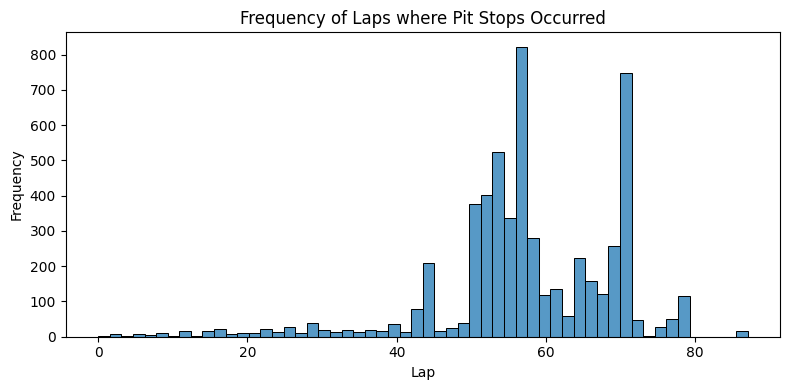

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(df.Laps)
plt.title(f'Frequency of Laps where Pit Stops Occurred')
plt.xlabel('Lap')
plt.ylabel('Frequency')
plt.tight_layout()
# plt.xlim(0, 100)
plt.show()

/var/folders/5y/bt24_ggs5f5d6mt5z_2n88fh0000gn/T/ipykernel_80460/2648803032.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')


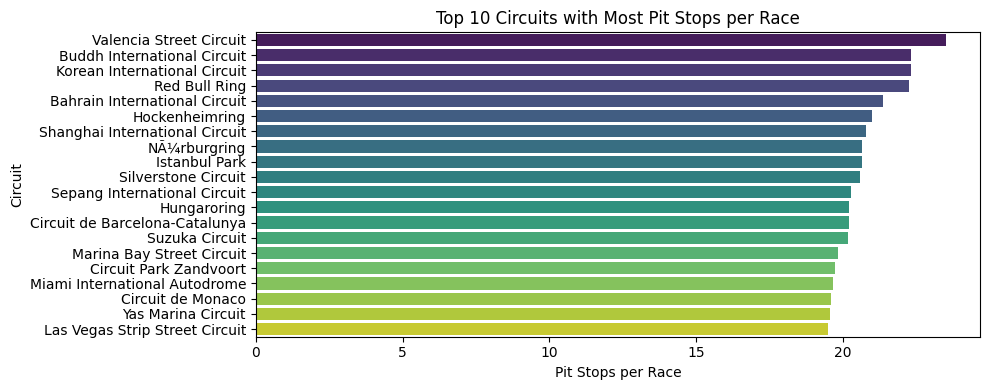

In [25]:
# Total pit stops per circuit
pitstops_per_circuit = df['Circuit'].value_counts()

# Number of races held at each circuit (count unique seasons)
races_per_circuit = df.groupby('Circuit')['Season'].nunique()

# Pit stops per race at each circuit
pitstops_per_race = pitstops_per_circuit / races_per_circuit

# Get top 10
top_10 = pitstops_per_race.sort_values(ascending=False).head(20)


plt.figure(figsize=(10, 4))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Top 10 Circuits with Most Pit Stops per Race')
plt.xlabel('Pit Stops per Race')
plt.ylabel('Circuit')
plt.tight_layout()
plt.show()

/var/folders/5y/bt24_ggs5f5d6mt5z_2n88fh0000gn/T/ipykernel_80460/1407873976.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_constructors.values, y=top_10_constructors.index, palette='magma')


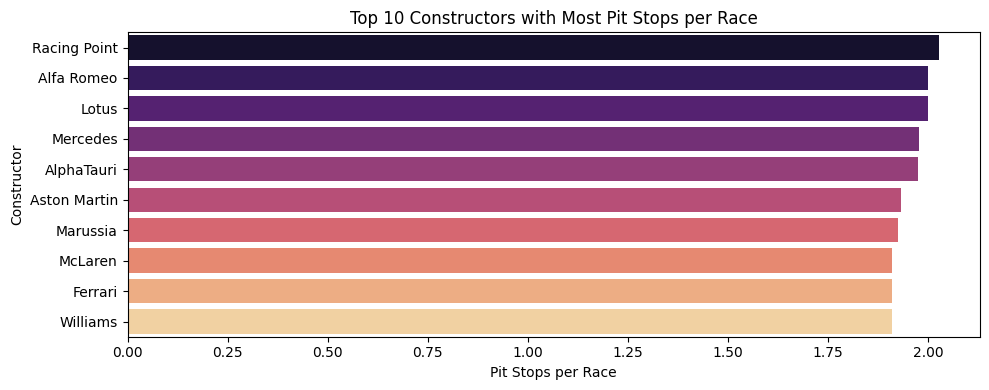

In [26]:
# Create a DataFrame of unique (Season, Circuit, Constructor) combinations = one row per race entry per constructor
unique_races = df[['Season', 'Circuit', 'Constructor']].drop_duplicates()

# Count how many races each constructor participated in
races_per_constructor = unique_races.groupby('Constructor').size()

# Total pit stops per constructor
pitstops_per_constructor = df['Constructor'].value_counts()

# Pit stops per race
pitstops_per_race_constructor = pitstops_per_constructor / races_per_constructor

# Get top 10 constructors by pit stops per race
top_10_constructors = pitstops_per_race_constructor.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_10_constructors.values, y=top_10_constructors.index, palette='magma')
plt.title('Top 10 Constructors with Most Pit Stops per Race')
plt.xlabel('Pit Stops per Race')
plt.ylabel('Constructor')
plt.tight_layout()
plt.show()

In [38]:
# Define the target and features
target = ['AvgPitStopTime', 'TotalPitStops']
features = ['Season', 'Round', 'Circuit', 'Driver', 'Constructor', 'Laps', 'Position']
X = pd.get_dummies(df[features])
y = df[target].astype('float')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}

for name, base_model in models.items():
    model = MultiOutputRegressor(base_model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Performance:")
    for i, target_name in enumerate(target):
        mse = mean_squared_error(y_test[target_name], y_pred[:, i])  # Compare the correct columns
        r2 = r2_score(y_test[target_name], y_pred[:, i])  # Compare the correct columns
        print(f"{target_name}: MSE = {mse:.2f}, R2 = {r2:.2f}")



Random Forest Performance:
AvgPitStopTime: MSE = 4517.07, R2 = 0.91
TotalPitStops: MSE = 0.35, R2 = 0.64

Gradient Boosting Performance:
AvgPitStopTime: MSE = 14130.84, R2 = 0.73
TotalPitStops: MSE = 0.60, R2 = 0.38

Linear Regression Performance:
AvgPitStopTime: MSE = 44622.90, R2 = 0.14
TotalPitStops: MSE = 0.76, R2 = 0.22

Ridge Regression Performance:
AvgPitStopTime: MSE = 44618.00, R2 = 0.14
TotalPitStops: MSE = 0.76, R2 = 0.22
